In [1]:
import numpy as np
import tellurium as te
import graphviz
import matplotlib.pyplot as plt
te.setDefaultPlottingEngine('matplotlib')
% matplotlib inline

In [23]:
specs = """
    # Initial Concentrations
    resources = 100.0; growth = 0.0; nMag_T7RNAPn = 0.0;
    pMag_T7RNAPc = 0.0; Mag_T7RNAP = 0.0; CAR = 0.0;
    
    # Rates
    k1 = 0.1; k2 = 0.1; k3_f = 0.2; k3_r = 0.05; k4 = 0.1; k5 = 0.5;
    
    # Reactions
    nMag_T7RNAPn_expression: resources -> nMag_T7RNAPn; k1 * resources;
    pMag_T7RNAPc_expression: resources -> pMag_T7RNAPc; k2 * resources;
    nMag_pMag_dimerization: nMag_T7RNAPn + pMag_T7RNAPc -> Mag_T7RNAP;
        k3_f * nMag_T7RNAPn * pMag_T7RNAPc - k3_r * Mag_T7RNAP;
    CAR_expression: resources -> CAR; k4 * Mag_T7RNAP * resources;
    growth_load: resources -> growth; k5 * resources;
"""

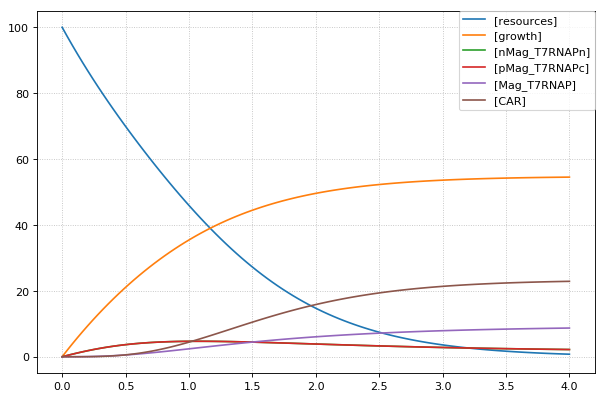

In [30]:
model = te.loada(specs)
model.simulate(0, 4, 100)
model.plot()

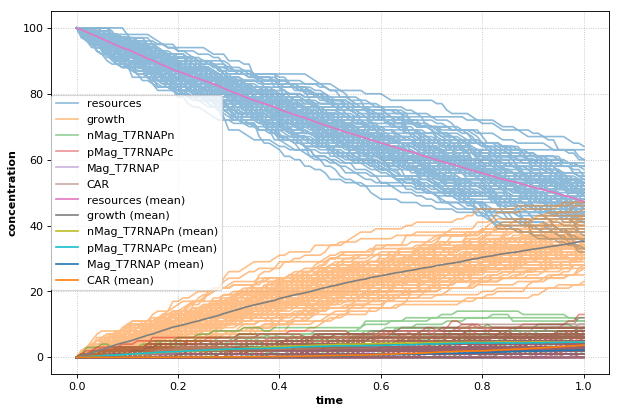

In [31]:
model = te.loada(specs)

# use a stochastic solver
model.integrator = 'gillespie'
model.integrator.seed = 23
# selections specifies the output variables in a simulation
selections = ['time'] + model.getBoundarySpeciesIds() + model.getFloatingSpeciesIds()
model.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(model.selections)
Nsim = 100
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    model.resetToOrigin()
    s = model.simulate(0, 1, points, selections=selections)
    s_sum += s
    # use show=False to add traces to the current plot
    # instead of starting a new one, equivalent to MATLAB hold on
    model.plot(s, alpha=0.5, show=False)

# add mean curve, legend, show everything and set labels, titels, ...
fig = te.plot(s[:,0], s_sum[:,1:]/Nsim, names=[x + ' (mean)' for x in selections[1:]], title="Stochastic simulation", xtitle="time", ytitle="concentration")

In [ ]:
model.gillespie(0, 10, 500);

In [ ]:
model.plot()

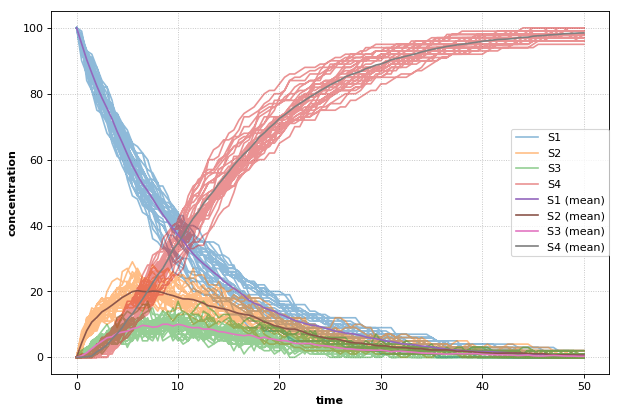

In [7]:

r = te.loada('''
    J1: S1 -> S2;  k1*S1;
    J2: S2 -> S3; k2*S2 - k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# use a stochastic solver
r.integrator = 'gillespie'
r.integrator.seed = 1234
# selections specifies the output variables in a simulation
selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()
r.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points, selections=selections)
    s_sum += s
    # use show=False to add traces to the current plot
    # instead of starting a new one, equivalent to MATLAB hold on
    r.plot(s, alpha=0.5, show=False)

# add mean curve, legend, show everything and set labels, titels, ...
fig = te.plot(s[:,0], s_sum[:,1:]/Nsim, names=[x + ' (mean)' for x in selections[1:]], title="Stochastic simulation", xtitle="time", ytitle="concentration")